In [172]:
import numpy as np
import pandas as pd

from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [173]:
df=pd.read_csv("/content/drive/MyDrive/Projects /HOUSE PRICE PREDICTION/gurgaon_properties_post_feature_selection_v2.csv")

In [174]:
df['furnishing_type']=df['furnishing_type'].replace({0.0:"unfurnished",1.0:"semifurnished",2.0:"furnished"})

# FOR THE BASELINE MODEL
### for linear regression we will apply OneHotEncoding,FeatureScaling Standard Scaling,for the price column as it is right skewed we will apply log transformation to make it normally distributed.

In [175]:
df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category
0,flat,sector 36,0.82,3.0,2.0,2,New Property,850.0,0.0,0.0,unfurnished,Low,Low Floor
1,flat,sector 89,0.95,2.0,2.0,2,New Property,1226.0,1.0,0.0,unfurnished,Low,Mid Floor
2,flat,sohna road,0.32,2.0,2.0,1,New Property,1000.0,0.0,0.0,unfurnished,Low,High Floor
3,flat,sector 92,1.60,3.0,4.0,3+,Relatively New,1615.0,1.0,0.0,semifurnished,High,Mid Floor
4,flat,sector 102,0.48,2.0,2.0,1,Relatively New,582.0,0.0,1.0,unfurnished,High,Mid Floor


In [177]:
X=df.drop(columns=['price'])
y=df['price']

In [178]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [179]:
#Apply the log1p transformation to the target variable
y_transf=np.log1p(y)

In [180]:
col_enc=['sector','balcony','agePossession','furnishing_type','luxury_category','floor_category','property_type']

In [181]:
ord_enc=['balcony','furnishing_type','luxury_category','floor_category']

In [186]:
#Creating ColumnTransformer for preprocessing
prep=ColumnTransformer(transformers=[
    ('num',StandardScaler(),['bedRoom','bathroom','built_up_area','servant room','store room']),
    ('cat',OneHotEncoder(drop='first',handle_unknown='ignore'),['sector','agePossession','property_type']),
    ('cat2',OrdinalEncoder(),ord_enc)
],remainder='passthrough')

In [187]:
#Creating a pipeline
pipe=Pipeline([
    ('preprocessor',prep),
    ('regressor',LinearRegression())
])

In [188]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y_transf,test_size=0.2,random_state=42)

In [189]:
#kfold cross validation
kfold=KFold(n_splits=10,shuffle=True,random_state=42)
score=cross_val_score(pipe,X_train,y_train,cv=10,scoring='r2')

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [190]:
score

array([0.85342079, 0.84322307, 0.88700082, 0.84854367, 0.82504758,
       0.88415273, 0.81272852, 0.85781379, 0.82611504, 0.84222595])

In [191]:
score.mean()

np.float64(0.8480271955325968)

In [192]:
score.std()

np.float64(0.022934838198704746)

In [193]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['bedRoom', 'bathroom',
                                                   'built_up_area',
                                                   'servant room',
                                                   'store room']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['sector', 'agePossession',
                                                   'property_type']),
                                                 ('cat2', OrdinalEncoder(),
                                                  ['balcony', 'furnishing_type',
                                                   'luxury_category',
                                                   'floor_category'])])),
                ('regressor', LinearRegression())])

In [194]:
y_pred=pipe.predict(X_test)

In [195]:
y_pred=np.expm1(y_pred) # to bring back the transformed y back to original form.

In [196]:
#this mae metric tells us that on an average our ml model does a mistake of 64 lacs in predicting the price of property
from sklearn.metrics import mean_absolute_error
mean_absolute_error(np.expm1(y_test),y_pred)

0.6491717852100399

### ASSUMPTION OF LINEAR REGRESSION

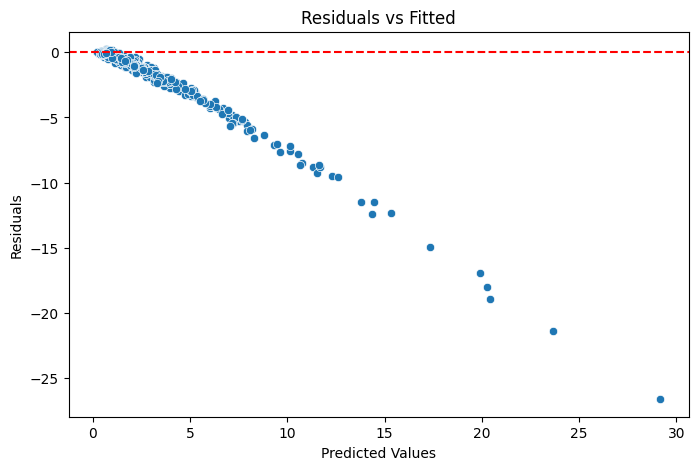

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

# y_test and y_pred from your pipeline
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()


You have a strong downward curve in residuals, which is a clear sign that the linearity assumption is violated.

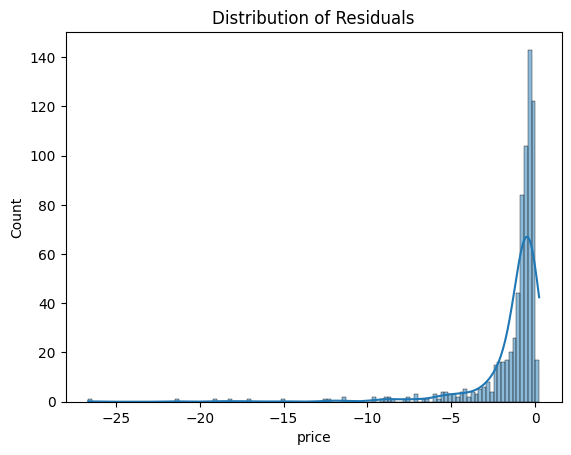

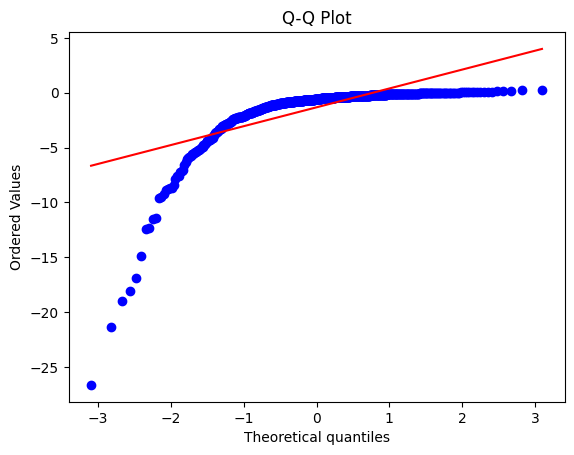

In [114]:
import scipy.stats as stats

# Histogram
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.show()

# Q-Q Plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()


Your residuals are not normally distributed.

### to improve this-
1. more feature eng can be done
2. more data can me used
3. hyperparameter tuning is possible
4. different models can be used

In [115]:
df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category
0,flat,sector 36,0.82,3.0,2.0,2,New Property,850.0,0.0,0.0,unfurnished,Low,Low Floor
1,flat,sector 89,0.95,2.0,2.0,2,New Property,1226.0,1.0,0.0,unfurnished,Low,Mid Floor
2,flat,sohna road,0.32,2.0,2.0,1,New Property,1000.0,0.0,0.0,unfurnished,Low,High Floor
3,flat,sector 92,1.60,3.0,4.0,3+,Relatively New,1615.0,1.0,0.0,semifurnished,High,Mid Floor
4,flat,sector 102,0.48,2.0,2.0,1,Relatively New,582.0,0.0,1.0,unfurnished,High,Mid Floor


In [116]:
X=df.drop(columns=['price'])
y=df['price']

In [117]:
# applying log1p transformation on target variable
y_transform=np.log1p(y)

In [121]:
from sklearn.metrics import mean_squared_error

def scorer(model_name,model):
    output=[]
    output.append(model_name)

    pipeline=Pipeline(
        [
            ('preprocessor',prep),
            ('regressor',model)
        ]
    )

    #K-fold cross validation
    kfold=KFold(n_splits=10,shuffle=True,random_state=42)
    score=cross_val_score(pipeline,X,y_transform,cv=kfold,scoring='r2')

    output.append(score.mean())

    X_train,X_test,y_train,y_test=train_test_split(X,y_transform,test_size=0.2,random_state=42)
    pipeline.fit(X_train,y_train)

    y_pred=pipeline.predict(X_test)
    y_pred=np.expm1(y_pred)

    output.append(mean_absolute_error(np.expm1(y_test),y_pred))
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(np.expm1(y_test), y_pred))
    output.append(rmse)
    return output


In [122]:
model_dict = {
    'linear_reg':LinearRegression(),
    'ridge':Ridge(alpha=1),
    'LASSO':Lasso(alpha=0.01, max_iter=10000),
}

In [123]:
model_output = []
for model_name,model in model_dict.items():
    model_output.append(scorer(model_name, model))

In [124]:
model_df=pd.DataFrame(model_output,columns=['name','r2','mae','rmse'])

In [125]:
model_df.sort_values(by='mae')

,name,r2,mae,rmse
0,linear_reg,0.854734,0.649172,1.632124
1,ridge,0.855030,0.653530,1.653693
2,LASSO,0.731172,0.971218,2.220145


### TARGET ENCODING


In [126]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.2 MB/s eta 0:00:00


In [128]:
import category_encoders as ce

In [129]:
df.sample()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category
3051,house,sector 26,8.9,4.0,4.0,3+,Old Property,2700.0,1.0,1.0,unfurnished,Medium,Low Floor


In [132]:
#Creating ColumnTransformer for preprocessing
prep=ColumnTransformer(transformers=[
    ('num',StandardScaler(),['bedRoom','bathroom','built_up_area','servant room','store room']),
    ('cat',OneHotEncoder(drop='first'),['agePossession','property_type']),
    ('cat2',OrdinalEncoder(),ord_enc),
    ('target_enc',ce.TargetEncoder(),['sector'])
],remainder='passthrough')

In [134]:
prep

ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 ['bedRoom', 'bathroom', 'built_up_area',
                                  'servant room', 'store room']),
                                ('cat', OneHotEncoder(drop='first'),
                                 ['agePossession', 'property_type']),
                                ('cat2', OrdinalEncoder(),
                                 ['balcony', 'furnishing_type',
                                  'luxury_category', 'floor_category']),
                                ('target_enc', TargetEncoder(), ['sector'])])

In [135]:
# Create the pipeline
pipeline=Pipeline([
    ('preprocessor',prep),
    ('regressor',LinearRegression())
])

In [136]:
#KFold cross validation
kfold=KFold(n_splits=10,shuffle=True,random_state=42)
score=cross_val_score(pipeline,X,y_transform,cv=kfold,scoring='r2')

In [138]:
score.mean()

np.float64(0.8289972166194003)

In [139]:
score.std()

np.float64(0.018959795853286904)

In [140]:
X_train,X_test,y_train,y_test=train_test_split(X,y_transform,test_size=0.2,random_state=42)

In [141]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['bedRoom', 'bathroom',
                                                   'built_up_area',
                                                   'servant room',
                                                   'store room']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['agePossession',
                                                   'property_type']),
                                                 ('cat2', OrdinalEncoder(),
                                                  ['balcony', 'furnishing_type',
                                                   'luxury_category',
                                                   'floor_category']),
                                                 ('target_enc', TargetEncoder(),
                                                  ['sector'])])),
                ('regressor', LinearRegression())])

In [142]:
y_pred=pipeline.predict(X_test)

In [143]:
y_pred=np.expm1(y_pred)

In [144]:
#this tells us that on predicting a new point,there will be an error in price prediction by 71 Lacs
mean_absolute_error(np.expm1(y_test),y_pred)

0.7145402275344857

In [145]:
rmse = np.sqrt(mean_squared_error(np.expm1(y_test), y_pred))
rmse

np.float64(1.7002569711920221)

In [150]:
def scorer(model_name,model):

  output=[]
  output.append(model_name)

  pipeline=Pipeline(
      [
          ('preprocessor',prep),
          ('regressor',model)
      ]
  )

  #Kfold
  kfold=KFold(n_splits=10,shuffle=True,random_state=42)
  score=cross_val_score(pipeline,X,y_transform,cv=kfold,scoring='r2')

  output.append(score.mean())

  X_train,X_test,y_train,y_test=train_test_split(X,y_transform,test_size=0.2,random_state=42)

  pipeline.fit(X_train,y_train)

  y_pred=pipeline.predict(X_test)
  y_pred=np.expm1(y_pred)

  output.append(mean_absolute_error(np.expm1(y_test),y_pred))
  return output

In [151]:
import xgboost as xgb

In [152]:
model_dict = {
    'decision tree': DecisionTreeRegressor(random_state=42),
    'random forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'gradient boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'xgboost': xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, verbosity=0)
}

In [153]:
model_output=[]

for model_name,model in model_dict.items():
  model_output.append(scorer(model_name,model))

In [154]:
model_df=pd.DataFrame(model_output,columns=['name','r2','mae'])
model_df.sort_values('mae',ascending=True)

,name,r2,mae
1,random forest,0.893829,0.471980
3,xgboost,0.901031,0.472484
2,gradient boosting,0.883766,0.526622
0,decision tree,0.802574,0.595032


### HYPERPARAMETER TUNING

In [163]:
from sklearn.model_selection import GridSearchCV

In [156]:
param_grid = {
    'regressor__n_estimators': [50,200,300],
    'regressor__max_depth': [None,10,20],
    'regressor__max_samples':[0.1,0.25,1.0],
    'regressor__max_features': ['auto','sqrt']
}

In [158]:
param_grid = {
    'regressor__n_estimators': [300],
    'regressor__max_depth': [20],
    'regressor__max_samples':[1.0],
    'regressor__max_features': ['sqrt']
}

In [ ]:
#{'regressor__max_depth': 20,
# 'regressor__max_features': 'sqrt',
# 'regressor__max_samples': 1.0,
# 'regressor__n_estimators': 300}

In [159]:
columns_to_encode = ['property_type','sector', 'balcony', 'agePossession', 'furnishing_type', 'luxury_category', 'floor_category']

# Creating a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['bedRoom', 'bathroom', 'built_up_area', 'servant room', 'store room']),
        ('cat', OrdinalEncoder(), columns_to_encode),
        ('cat1',OneHotEncoder(drop='first',sparse_output=False),['agePossession']),
        ('target_enc', ce.TargetEncoder(), ['sector'])
    ],
    remainder='passthrough'
)

In [160]:
pipeline=Pipeline(
    [
        ('preprocessor',preprocessor),
        ('regressor',RandomForestRegressor())
    ]
)

In [161]:
kfold=KFold(n_splits=10,shuffle=True,random_state=42)

In [164]:
search=GridSearchCV(pipeline,param_grid,cv=kfold,scoring='r2',n_jobs=-1,verbose=4)

In [165]:
search.fit(X,y_transform)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['bedRoom',
                                                                          'bathroom',
                                                                          'built_up_area',
                                                                          'servant '
                                                                          'room',
                                                                          'store '
                                                                          'room']),
                                                                        ('cat',
                                                                         OrdinalEncoder(),
                                                                         ['property_type',
                                                                          'sector',
                                                                          'balcony',
                                                                          'agePossession',
                                                                          'furnishing_type',...
                                                                          'floor_category']),
                                                                        ('cat1',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         ['agePossession']),
                                                                        ('target_enc',
                                                                         TargetEncoder(),
                                                                         ['sector'])])),
                                       ('regressor', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [20],
                         'regressor__max_features': ['sqrt'],
                         'regressor__max_samples': [1.0],
                         'regressor__n_estimators': [300]},
             scoring='r2', verbose=4)

In [166]:
finalpipe=search.best_estimator_

In [167]:
search.best_params_

{'regressor__max_depth': 20,
 'regressor__max_features': 'sqrt',
 'regressor__max_samples': 1.0,
 'regressor__n_estimators': 300}

In [168]:
search.best_score_

np.float64(0.9021729354304181)

In [169]:
finalpipe.fit(X,y_transform)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['bedRoom', 'bathroom',
                                                   'built_up_area',
                                                   'servant room',
                                                   'store room']),
                                                 ('cat', OrdinalEncoder(),
                                                  ['property_type', 'sector',
                                                   'balcony', 'agePossession',
                                                   'furnishing_type',
                                                   'luxury_category',
                                                   'floor_category']),
                                                 ('cat1',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['agePossession']),
                                                 ('target_enc', TargetEncoder(),
                                                  ['sector'])])),
                ('regressor',
                 RandomForestRegressor(max_depth=20, max_features='sqrt',
                                       max_samples=1.0, n_estimators=300))])

In [170]:
from sklearn.metrics import mean_absolute_error
import numpy as np

# Predict
y_pred = finalpipe.predict(X)

# If your y_transform is log-transformed, apply expm1 to get original scale
y_true = np.expm1(y_transform) if 'log' in str(type(y_transform)) or hasattr(y_transform, 'dtype') and np.any(y_transform < 0) else y_transform
y_pred_orig = np.expm1(y_pred) if np.any(y_pred < 0) else y_pred

# Compute MAE
mae = mean_absolute_error(y_true, y_pred_orig)
print("Mean Absolute Error (MAE):", mae)


Mean Absolute Error (MAE): 0.04239885804315155


## EXPORTING THE MODEL

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['bedRoom', 'bathroom', 'built_up_area', 'servant room', 'store room']),
        ('cat', OrdinalEncoder(), columns_to_encode),
        ('cat1',OneHotEncoder(drop='first',sparse_output=False),['sector','agePossession'])
    ],
    remainder='passthrough'
)

In [ ]:

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=500))
])

In [ ]:
pipeline.fit(X,y_transform)

In [ ]:
import pickle

with open('pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

In [ ]:
with open('df.pkl', 'wb') as file:
    pickle.dump(X, file)

In [ ]:
X

In [ ]:
X.columns

In [ ]:
X.iloc[0].values

In [ ]:
data = [['flat', 'sector 55', 2, 2, '1', 'Old Property',1040, 0, 0, 'furnished', 'Low', 'Low Floor']]
columns = ['property_type', 'sector', 'bedRoom', 'bathroom', 'balcony',
       'agePossession', 'built_up_area', 'servant room', 'store room',
       'furnishing_type', 'luxury_category', 'floor_category']

In [ ]:
# Convert to DataFrame
one_df = pd.DataFrame(data, columns=columns)

one_df

In [ ]:
np.expm1(pipeline.predict(one_df))

In [ ]:
df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category
0,flat,sector 36,0.82,3.0,2.0,2,New Property,850.0,0.0,0.0,unfurnished,Low,Low Floor
1,flat,sector 89,0.95,2.0,2.0,2,New Property,1226.0,1.0,0.0,unfurnished,Low,Mid Floor
2,flat,sohna road,0.32,2.0,2.0,1,New Property,1000.0,0.0,0.0,unfurnished,Low,High Floor
3,flat,sector 92,1.60,3.0,4.0,3+,Relatively New,1615.0,1.0,0.0,semifurnished,High,Mid Floor
4,flat,sector 102,0.48,2.0,2.0,1,Relatively New,582.0,0.0,1.0,unfurnished,High,Mid Floor


In [ ]:
X=df.drop(columns=['price'])
y=df['price']

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Define categorical and numerical columns
categorical_features = ['sector', 'balcony', 'agePossession', 'furnishing_type', 'luxury_category', 'floor_category']
numerical_features = ['bedRoom', 'bathroom', 'built_up_area', 'servant room', 'store room']

# Preprocessor
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
], remainder='passthrough')

# Create pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model.fit(X_train, y_train)

# Predict
predictions = model.predict(X_test)
print("Predictions:", predictions)
